In [1]:
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

size, seed= 5000, 0
np.random.seed(seed)

x= np.random.normal(size=size)
e = np.random.normal(size=size)

y= 0*x + e


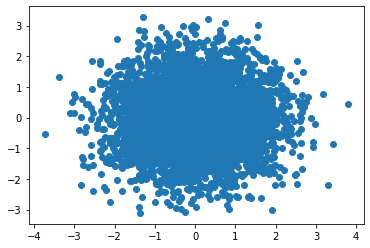

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)

In [4]:
cXY = np.histogram2d(x, y)
cXY

(array([[  0.,   0.,   0.,   0.,   1.,   4.,   2.,   0.,   0.,   0.],
        [  0.,   3.,   9.,   7.,  10.,  10.,   6.,   3.,   0.,   0.],
        [  1.,   6.,  27.,  49.,  73.,  70.,  44.,  23.,   1.,   0.],
        [  4.,  21.,  63., 144., 235., 205., 130.,  37.,  17.,   5.],
        [ 13.,  41., 136., 228., 361., 308., 185.,  93.,  29.,   7.],
        [  7.,  30., 110., 253., 325., 294., 209.,  82.,  25.,   4.],
        [ 10.,  20.,  61., 131., 186., 187.,  92.,  39.,  22.,   0.],
        [  2.,   3.,  22.,  37.,  69.,  63.,  41.,  16.,   1.,   1.],
        [  0.,   2.,   3.,   7.,  14.,  11.,   3.,   3.,   0.,   0.],
        [  0.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.]]),
 array([-3.74010064, -2.98592455, -2.23174847, -1.47757238, -0.7233963 ,
         0.03077979,  0.78495587,  1.53913196,  2.29330804,  3.04748413,
         3.80166021]),
 array([-3.12620148, -2.4843119 , -1.84242232, -1.20053274, -0.55864316,
         0.08324642,  0.725136  ,  1.36702558,  2.008915

In [8]:
display(np.histogram(x))
hX = ss.entropy(np.histogram(x)[0])
display(hX)

(array([   7,   48,  294,  861, 1401, 1339,  748,  255,   43,    4],
       dtype=int64),
 array([-3.74010064, -2.98592455, -2.23174847, -1.47757238, -0.7233963 ,
         0.03077979,  0.78495587,  1.53913196,  2.29330804,  3.04748413,
         3.80166021]))

1.7152372584692268

In [9]:
hY = ss.entropy(np.histogram(y)[0])
display(hY)

1.8696012906742487

In [11]:
cXY

(array([[  0.,   0.,   0.,   0.,   1.,   4.,   2.,   0.,   0.,   0.],
        [  0.,   3.,   9.,   7.,  10.,  10.,   6.,   3.,   0.,   0.],
        [  1.,   6.,  27.,  49.,  73.,  70.,  44.,  23.,   1.,   0.],
        [  4.,  21.,  63., 144., 235., 205., 130.,  37.,  17.,   5.],
        [ 13.,  41., 136., 228., 361., 308., 185.,  93.,  29.,   7.],
        [  7.,  30., 110., 253., 325., 294., 209.,  82.,  25.,   4.],
        [ 10.,  20.,  61., 131., 186., 187.,  92.,  39.,  22.,   0.],
        [  2.,   3.,  22.,  37.,  69.,  63.,  41.,  16.,   1.,   1.],
        [  0.,   2.,   3.,   7.,  14.,  11.,   3.,   3.,   0.,   0.],
        [  0.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.]]),
 array([-3.74010064, -2.98592455, -2.23174847, -1.47757238, -0.7233963 ,
         0.03077979,  0.78495587,  1.53913196,  2.29330804,  3.04748413,
         3.80166021]),
 array([-3.12620148, -2.4843119 , -1.84242232, -1.20053274, -0.55864316,
         0.08324642,  0.725136  ,  1.36702558,  2.008915

In [12]:
iXY = mutual_info_score(None, None, contingency=cXY[0])
print(iXY)
iXYn=iXY/min(hX, hY) # normalized mutual information
hXY = hX + hY - iXY
hX_Y=hXY-hY # conditional
hY_X=hXY-hX

0.009308477353687773


In [14]:
#Tying together with the additional metric of Variation of Information
def varInfo(x, y, bins, norm=False):
    cXY = np.histogram2d(x,y,bins)[0]
    iXY = mutual_info_score(None, None, contingency=cXY)
    hX = ss.entropy(np.histogram(x, bins)[0])
    hY = ss.entropy(np.histogram(y, bins)[0])
    vXY = hX + hY - 2*iXY
    
    if norm:
        hXY = hX + hY - iXY
        vXY = vXY/hXY #normalized variation of information
    return vXY

# Optimal number of bins from Hacine-Gharbi et al 2012
def numBins(nObs, corr=None):
    if corr is None:
        z = (8+324 * nObs + 12 *(36*nObs + 729*nObs**2)**.5) **(1/3.)
        b = round(z/6. + 2./(3*z) + 1./3)
    else:
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5)
    return int(b)

def varInfo(x, y, norm=False):
    # Calculate Variational of Information using the Optimal Bins
    bins = numBins(x.shape[0], corr=np.corrcoef(x,y)[0,1])
    
    cXY = np.histogram2d(x,y,bins)[0]
    iXY = mutual_info_score(None, None, contingency=cXY)
    hX = ss.entropy(np.histogram(x, bins)[0])
    hY = ss.entropy(np.histogram(y, bins)[0])
    vXY = hX + hY - 2*iXY
    
    if norm:
        hXY = hX + hY - iXY
        vXY = vXY/hXY #normalized variation of information
    return vXY


In [15]:
def MutualInfo(x, y, norm=False):
    bins = numBins(x.shape[0], corr=np.corrcoef(x,y)[0,1])
    
    cXY = np.histogram2d(x,y,bins)[0]
    iXY = mutual_info_score(None, None, contingency=cXY)
    
    if norm:
        hX = ss.entropy(np.histogram(x, bins)[0])
        hY = ss.entropy(np.histogram(y, bins)[0])
        iXY/-min(hX, hY)
    return iXY

In [21]:
x= np.random.normal(size=size)
e = np.random.normal(size=size)

def plot_xy(coef):
    y= coef*x + e
    plt.scatter(x, y)
    nmi = MutualInfo(x, y, True)
    corr =np.corrcoef(x, y)[0, 1]
    print("nm {}, corr {}".format(nmi, corr))

nm 0.014296922725028688, corr 0.008164565502319898
nm 3.7944224960989086, corr 0.999948559979


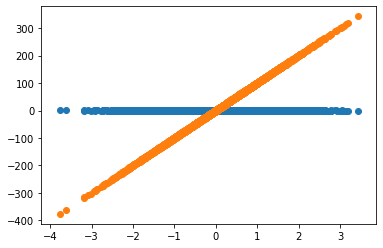

In [22]:
plot_xy(0)
plot_xy(100)

## The correlation coefficient failed here, as expected
but Mutual Information still retains some info

nm 1.0817713527248964, corr -6.088281803148087e-05


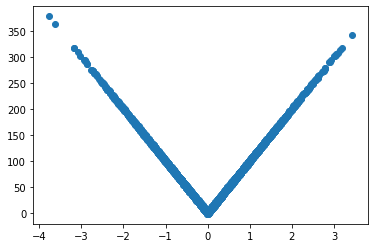

In [23]:
y = 100*np.abs(x) + e
plt.scatter(x, y)
nmi = MutualInfo(x, y, True)
corr =np.corrcoef(x, y)[0, 1]
print("nm {}, corr {}".format(nmi, corr))

nm 0.7171611264839632, corr -0.0034945990113950214


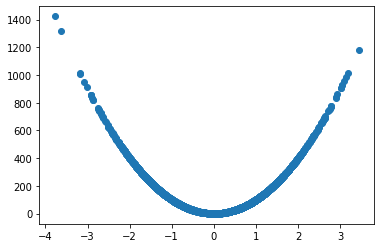

In [24]:
y = 100*x**2 + e
plt.scatter(x, y)
nmi = MutualInfo(x, y, True)
corr =np.corrcoef(x, y)[0, 1]
print("nm {}, corr {}".format(nmi, corr))

nm 0.702943906834824, corr -0.003547754308606024


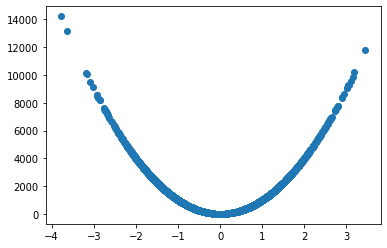

In [27]:
y = 1000 * x**2 + e
plt.scatter(x, y)
nmi = MutualInfo(x, y, True)
corr =np.corrcoef(x, y)[0, 1]
print("nm {}, corr {}".format(nmi, corr))